# 프로젝트(1) 손글씨 분류하기

## 1. 모듈 import

In [61]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2. 데이터 준비

In [62]:
digits = load_digits()
print('데이터셋 로드 완료')

# 데이터셋에 어떤 정보들이 담겨 있는지 확인
digits.keys()

데이터셋 로드 완료


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## 3. 데이터 이해하기

In [63]:
# feature 데이터

digits_data = digits.data
digits_data.shape

(1797, 64)

In [64]:
# feature 데이터 샘플 확인

# 각 숫자는 픽셀값을 의미함
# 길이 64의 숫자 배열은 8x8 픽셀의 이미지를 일렬로 쭉 펴놓은 것
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

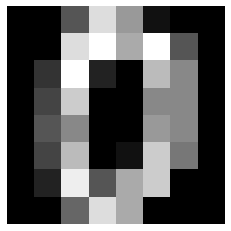

In [65]:
# 데이터 이미지로 확인해보기
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

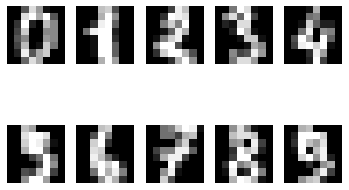

In [66]:
# 다른 숫자 이미지도 출력해보기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [67]:
# label 데이터

digits_label = digits.target
print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [68]:
# label 이름 확인

print(digits.target_names)
print(digits.target_names.dtype)
# 0~9까지 정수

[0 1 2 3 4 5 6 7 8 9]
int64


In [69]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [70]:
# pandas로 데이터 샘플 확인하기
import pandas as pd

digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## 4. train, test 데이터 분리
- 학습과 테스트를 진행하기 위해 1,797개의 데이터를 분류해준다

In [71]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=7) # 랜덤값은 7로 고정

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


## 5. 모델학습 및 예측

- 준비한 데이터셋을 이용하여, 다양한 딥러닝 모델을 적용시켜 본다.
- 학습 후, 모델의 테스트 데이터 예측 결과를 해석하면서 모델의 성능 평가 지표로는 무엇이 좋을지 생각해본다.
- sklearn.metrics에서 제공하는 평가지표 중 가장 적절하다고 생각되는 것을 고르고, 이유를 설명한다.

### 5-1. 의사결정나무

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier(random_state=32)

# 모델 학습
decision_tree.fit(X_train, y_train)

# 모델 예측
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



### 5-2. 랜덤 포레스트

In [73]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



### 5-3. SVM

In [74]:
from sklearn import svm

svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### 5-4. SGDClassifier

In [75]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.86      0.90      0.88        42
           2       0.97      0.97      0.97        40
           3       0.80      0.97      0.88        34
           4       0.97      0.97      0.97        37
           5       0.90      1.00      0.95        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.95      0.84      0.89        43
           9       1.00      0.81      0.90        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



### 5-5. 로지스틱 회귀

In [76]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=20000)


logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



## 6. 모델 해석 및 평가

- 총 1797개의 손글씨 이미지(0~9) 10개의 클래스로 분류하는 문제
- 손글씨 이미지 분류기는 숫자를 얼마나 정확하게 맞추는 것이 중요한 문제이므로 accuracy를 가장 우선적으로 봐야할 것 같다.

__모델 평가결과(accuracy)__
- Decision Tree : 0.89
- Random Forest : 0.96
- SVM : 0.99
- SGD : 0.94
- Logistic Regression : 0.95

__시사점__
- 모델 전반적으로 숫자 8, 9에 대한 recall 수치가 낮게 나왔다. (8, 9가 맞는데 아니라고 예측한 경우가 많았다는 것)
- 5개 모델 중 __SVM__ 이 가장 성능이 좋은 __높은 정확도(0.99)__ 를 보여주었기 때문에 가장 적합한 모델인 것 같다.
- SVM에 대한 구글링을 해본 결과 현실 세계에서도 이미지를 분류하는 작업에서 많이 사용하고, SVM을 통해서 손글씨의 특징을 이해할 수 있다고 한다.

# 프로젝트 (2) 와인 분류

## 1. 모듈 import

In [77]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2. 데이터 준비

In [78]:
wine = load_wine()

In [79]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

## 3. 데이터 이해하기

In [80]:
# data 확인

wine_data = wine.data

print(wine_data.shape)
wine_data[0]

(178, 13)


array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [81]:
# label 확인

wine_label = wine.target

print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [82]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [83]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [84]:
# DataFrame으로 데이터 구조 쉽게 이해하기
# wine 데이터 DataFrame 전환

import pandas as pd

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [85]:
# label 컬럼 추가
wine_df["label"] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [86]:
wine_df.shape

(178, 14)

In [87]:
wine_df["label"].value_counts()

1    71
0    59
2    48
Name: label, dtype: int64

## 4. train, test 데이터 분리

In [88]:
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_label,
                                                   test_size=0.2,
                                                   random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


## 5. 모델 학습 및 예측

### 5-1. 의사결정나무

In [89]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### 5-2. 랜덤 포레스트

In [90]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 5-3. SVM

In [91]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



### 5-4. SGD Classifier

In [92]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      1.00      0.45         7
           1       0.91      0.59      0.71        17
           2       1.00      0.08      0.15        12

    accuracy                           0.50        36
   macro avg       0.73      0.56      0.44        36
weighted avg       0.82      0.50      0.48        36



### 5-5. 로지스틱 회귀

In [93]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=20000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



## 6. 모델 해석 및 평가

- 178개의 와인 데이터를 3개의 클래스 중 하나로 올바르게 분류하는 문제
- 와인 분류기는 단순 분류 형태로 얼마나 정확하게 분류하는지가 중요하기 때문에 Accuracy의 값이 가장 중요한 지표로 판단된다.
- 추가적으로 Precision과 Recall 중 어떤 지표가 더 중요하냐고 질문한다면 예측 오류에 따른 크리티컬한 문제가 발생하는 건 아니기 때문에 Precision을 더 중요하게 고려해야 할 것 같다.

__모델 평가결과(accuracy)__
- Decision Tree : 0.94
- Random Forest : 1.00
- SVM : 0.61
- SGD : 0.64
- Logistic Regression : 0.97

__모델 평가결과(precision)__
- Decision Tree : 0.96 / 0.95
- Random Forest : 1.00 / 1.00
- SVM : 0.59 / 0.55
- SGD : 0.44 / 0.33
- Logistic Regression : 0.98 / 0.97

__시사점__
- SVM과, SGD 모델의 정확도가 매우 낮게 나왔다. confusion matrix를 확인해보니 class_2에 대한 정답을 거의 맞추지 못했다. 다른 모델은 95% 이상의 정답을 맞춘 것을 보면 SVM, SGD 모델의 알고리즘이 이 데이터셋에는 적합하지 않는 이유가 있을 것 같다.
- Random Forest 모델의 정확도가 1.0으로 가장 높게 나와 가장 적합한 모델로 판단된다.

# 프로젝트 (3) 유방암 여부 진단하기

## 1. 모듈 import

In [94]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2. 데이터 준비

In [95]:
breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## 3. 데이터 이해하기

In [96]:
# data 정보 확인
breast_cancer_data = breast_cancer.data
breast_cancer_data.shape

(569, 30)

In [97]:
breast_cancer_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [98]:
# label 정보
breast_cancer_label = breast_cancer.target
breast_cancer_label.shape

(569,)

In [99]:
breast_cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [100]:
# target.names 정보
# malignant (악성), benign (양성)

breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [101]:
# feature_names 정보
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [102]:
# 유방암 데이터 DataFrame 변환
import pandas as pd

breast_cancer_df = pd.DataFrame(data=breast_cancer.data,
                               columns=breast_cancer.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [103]:
# 정답 데이터 컬럼 추가
breast_cancer_df["label"] = breast_cancer.target
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 4. train, test 데이터 분리

In [104]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
                                                   breast_cancer_label,
                                                   test_size=0.2,
                                                   random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


## 5. 모델 학습 및 예측

### 5-1. 의사결정나무

In [105]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



### 5-2. 랜덤 포레스트

In [106]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



### 5-3. SVM

In [107]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



### 5-4. SGD Classifier

In [108]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        40
           1       0.80      1.00      0.89        74

    accuracy                           0.83       114
   macro avg       0.90      0.76      0.79       114
weighted avg       0.87      0.83      0.82       114



### 5-5. 로지스틱 회귀

In [109]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=20000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# 6. 모델 해석 및 평가

- 총 569개 유방암 데이터를 활용하여 악성/양성으로 분류하는 문제
- 질병에 관련된 문제는 오진 시 환자의 생명과 직결되는 문제이므로 단순한 정확도 보다는 FN을 얼마나 최소화 하는 것이 중요하기 때문에 Recall이 중요하다고 판단된다.

__모델 평가결과(recall)__
- Decision Tree : 0.89 / 0.91
- Random Forest : 1.00 / 1.00
- SVM : 0.86 / 0.90
- SGD : 0.88 / 0.86
- Logistic Regression  : 0.93 / 0.95

__시사점__
- 각 모델의 Recall 값을 분석해본 결과, 의사결정나무/SVM/로지스틱 회귀 모델의 0(악성) recall이 낮게 나왔다. 
- 즉, 악성인데 양성이라고 진단한 결과가 많았다는 것이기 때문에 적합한 모델이라고 생각 되지 않는다.
- 결과적으로 Recall이 1.0로 가장 높은 성능을 보여준 __Random Forest__ 가 가장 적합하다고 생각된다.

# 회고

- 두번째 프로젝트 노드는 첫번째 노드에 비해 상대적으로는 조금 수월 했던 것 같다.  
- 하지만, 5가지 평가 모델에 대한 개념과 알고리즘 구조 정확히 이해하는 것이 매우 어려운 일인 것 같다. (어떤 상황에서 어떤 모델을 사용하는 것이 적합한 것인지...)
- 앞으로 교육기간 동안 다른 노드와 풀잎스쿨을 진행하면 해당 모델에 대한 이해도를 높여야 할 것 같다.